In [476]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import interpolation as inter
from skimage.filters import gaussian
from scipy.signal import convolve2d
from contour_sort import *
from fix_image_orientation import *
from crop_image import *
from paper_extraction import *
from commonfunctions import *
from skimage.feature import canny
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
import os

In [477]:
img = cv2.imread('../../Results/Results/2/4/1.jpg')
#img = cv2.imread('./100470.png')

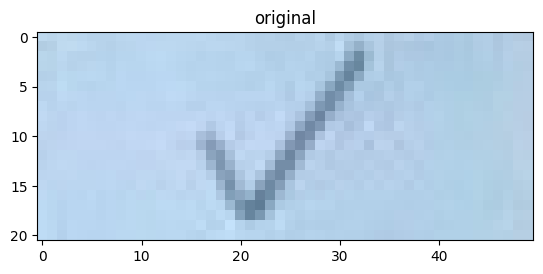

In [478]:
show_images([img], ['original'])

In [479]:
colors=[(255,0,0)
,(0,255,0)
,(0,0,255)
,(255,255,192)
,(0,128,128)
,(255,215,0)
,(255,0,0)
,(0,255,0)
,(0,0,255)
,(0,255,0)
,(255,0,0)

,(225,255,128)
,(128,0,0)
,(128,128,0)
,(0,128,0)
,(128,0,128)

,(0,0,128)
,(255,215,0)]

In [508]:
def detect_check_mark(num):
    img = cv2.imread(f'../../../temp for thres/7.jpg')
    #print(img.shape)
    temp=np.zeros_like(img)
    #print(temp)
    #show_images([temp], ['original'])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #     blur = cv2.GaussianBlur(img , (0,0), sigmaX=100, sigmaY=100)

    #     img = cv2.divide(img, blur, scale=255)
    img=cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
             cv2.THRESH_BINARY_INV, 51, 15)
    #     img=cv2.dilate(img,np.ones((2,2)),iterations=2)
    #     img=cv2.erode(img,np.ones((2,2)),iterations=1
    img=skeletonize(img,method='lee')
    #img=cv2.dilate(img,np.ones((2,2)),iterations=2)
    lines_ver = cv2.HoughLinesP(img,1,np.pi/300,threshold=25,maxLineGap=15)
    #show_images([img], ['original'])
    slopes=[]
    for index,line  in enumerate(lines_ver):
        #print(line)
        for x1, y1, x2, y2 in line:
            #print(x1, y1, x2, y2)
            slopes.append((y2-y1)/(x2-x1))
            temp=cv2.line(temp,(x1,y1),(x2,y2),colors[index%len(colors)],1)
    #print(slopes)
    show_images([img], ['original'])
    show_images([temp], ['temp'])
    #print(len(lines_ver))
    slopes=np.sort(np.degrees(np.arctan(slopes)))
    ver_error=(slopes>=-90) & (slopes<=-83)
    slopes[ver_error]*=-1
    print(slopes)
    pos_ang=slopes[slopes>0]
    neg_ang=np.abs(slopes[slopes<0])

    if(not len(pos_ang) or not len(neg_ang)):
        return False
    right_line = np.mean(neg_ang) if len(neg_ang)<=2 else np.median(neg_ang) 
    left_line = np.mean(pos_ang) if len(pos_ang)<=2 else np.median(pos_ang)
    
    #print(left_line,right_line)
    diff_ang=left_line+right_line 
    return diff_ang>100 and diff_ang<155
print(detect_check_mark('name'))

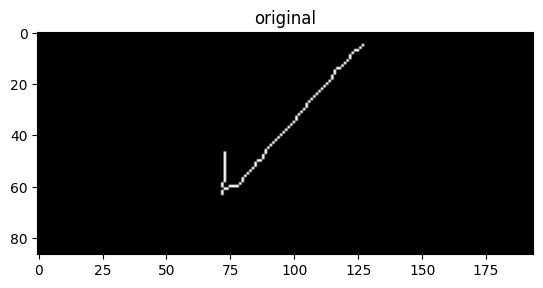

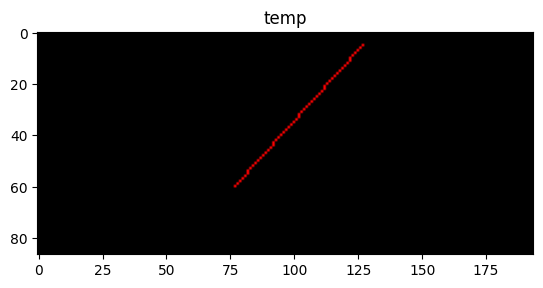

[-47.72631099]
False


In [509]:
# path='../../../temp for thres/'
# dir_list = os.listdir(path)
# for name in dir_list:
print(detect_check_mark('name'))